# Linear Regression 


--- Iteration 1 ---


# V - Homoscedasticity (Breusch-Pagan Test)
Breusch-Pagan test statistic: 207.8143
Breusch-Pagan test p-value: 0.0000
H₀: The residuals have constant variance (homoscedasticity)
Hₐ: The residuals do NOT have constant variance (heteroscedasticity)
➡️ We REJECT H₀ → Evidence suggests NO homoscedasticity (i.e., heteroscedasticity present)


# I - Autocorrelation (Durbin-Watson & Breusch-Godfrey)
Durbin-Watson statistic: 1.977 (≈2 indicates no autocorrelation)
Breusch-Godfrey test statistic: 0.0699
Breusch-Godfrey test p-value: 0.7915
H₀: The residuals are independent (no autocorrelation)
Hₐ: The residuals are NOT independent (autocorrelation present)
✅ We FAIL TO REJECT H₀ → No evidence of autocorrelation


# N - Normality of Residuals (Shapiro-Wilk & Anderson-Darling)
Shapiro-Wilk test statistic: 0.9900, p-value: 0.0000
H₀: The residuals are normally distributed
Hₐ: The residuals are NOT normally distributed
➡️ We REJECT H₀ → Residuals are NOT normally distributed


/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279:



# V - Homoscedasticity (Breusch-Pagan Test)
Breusch-Pagan test statistic: 207.1989
Breusch-Pagan test p-value: 0.0000
H₀: The residuals have constant variance (homoscedasticity)
Hₐ: The residuals do NOT have constant variance (heteroscedasticity)
➡️ We REJECT H₀ → Evidence suggests NO homoscedasticity (i.e., heteroscedasticity present)


# I - Autocorrelation (Durbin-Watson & Breusch-Godfrey)
Durbin-Watson statistic: 1.977 (≈2 indicates no autocorrelation)
Breusch-Godfrey test statistic: 0.0663
Breusch-Godfrey test p-value: 0.7968
H₀: The residuals are independent (no autocorrelation)
Hₐ: The residuals are NOT independent (autocorrelation present)
✅ We FAIL TO REJECT H₀ → No evidence of autocorrelation


# N - Normality of Residuals (Shapiro-Wilk & Anderson-Darling)
Shapiro-Wilk test statistic: 0.9900, p-value: 0.0000
H₀: The residuals are normally distributed
Hₐ: The residuals are NOT normally distributed
➡️ We REJECT H₀ → Residuals are NOT normally distributed
Anderson-Darling test

/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279:

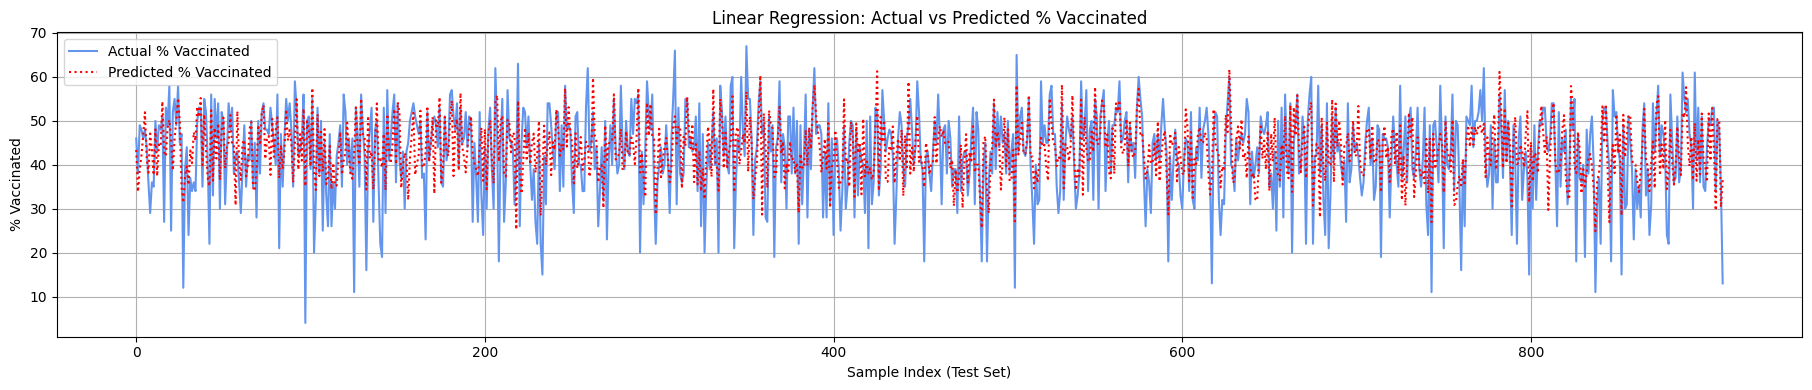



=== Final Model Metrics ===
R²: 0.4108
SSE: 56036.5203
RMSE: 7.8429
MAPE: 18.6985


=== Variance Inflation Factor (VIF) Table ===
                                        feature      VIF
                                          const 1.004539
                          % Children in Poverty 5.741786
         % Children in Single-Parent Households 3.732295
                      % Severe Housing Problems 2.495027
                                   % Homeowners 2.390769
             % Households with Broadband Access 3.603834
                    % Less Than 18 Years of Age 3.893648
                                  % 65 and Over 4.029467
                                        % Black 3.922357
              % American Indian & Alaska Native 2.350265
                                        % Asian 2.309536
    % Native Hawaiian or Other Pacific Islander 1.357087
                                     % Hispanic 4.151952
                    % Not Proficient in English 4.598427
             

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, anderson

# === 1. Load data ===
df = pd.read_excel("/Users/jacobhahn/Desktop/CSUREMM 2025/DATASET_pre_covid.xlsx")
df = df.drop(columns=["FIPS", "State, County"], errors="ignore")
df_numeric = df.select_dtypes(include=[np.number])
y_full = df_numeric["% Vaccinated"]
X_full = df_numeric.drop(columns=["% Vaccinated"], errors="ignore")

# === 2. Define pipeline ===
def run_pipeline(X_raw, y_raw, vif_thresh=10, cond_thresh=1e12):
    dropped_features = []
    iteration = 0

    while True:
        iteration += 1
        print(f"\n--- Iteration {iteration} ---")

        zero_var = X_raw.columns[X_raw.std() < 1e-8]
        if len(zero_var):
            print(f"Dropping near-zero variance columns: {list(zero_var)}")
            X_raw = X_raw.drop(columns=zero_var)

        imputer = IterativeImputer(random_state=42)
        X_imputed = imputer.fit_transform(X_raw)
        X = pd.DataFrame(X_imputed, columns=X_raw.columns)
        mask = y_raw.notna()
        X = X.loc[mask].reset_index(drop=True)
        y = y_raw[mask].reset_index(drop=True)

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X = pd.DataFrame(X_scaled, columns=X.columns)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3141)

        cond_number = np.linalg.cond(X_train.T @ X_train)
        if cond_number > cond_thresh:
            print(f"⚠️ Condition number too high: {cond_number:.2e}")
            corr_matrix = X_train.corr().abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            to_drop = upper.stack().idxmax()[1]
            print(f"Dropping column '{to_drop}' to stabilize matrix.")
            X_raw = X_raw.drop(columns=[to_drop])
            dropped_features.append(to_drop)
            continue

        model = LinearRegression()
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            residuals = y_test - y_pred
            residuals_train = y_train - model.predict(X_train)
        except Exception as e:
            print(f"⚠️ LinearRegression failed: {e}")
            break

        SSE = np.sum(residuals ** 2)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        MAPE = np.mean(np.abs(residuals / y_test)) * 100
        R2 = model.score(X_test, y_test)

        X_train_const = sm.add_constant(X_train)
        sm_model = sm.OLS(y_train, X_train_const).fit()

        print("\n\n# V - Homoscedasticity (Breusch-Pagan Test)")
        bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_train, X_train_const)
        print(f"Breusch-Pagan test statistic: {bp_stat:.4f}")
        print(f"Breusch-Pagan test p-value: {bp_pvalue:.4f}")
        print("H₀: The residuals have constant variance (homoscedasticity)")
        print("Hₐ: The residuals do NOT have constant variance (heteroscedasticity)")
        if bp_pvalue < 0.05:
            print("➡️ We REJECT H₀ → Evidence suggests NO homoscedasticity (i.e., heteroscedasticity present)")
        else:
            print("✅ We FAIL TO REJECT H₀ → Residuals appear homoscedastic")

        print("\n\n# I - Autocorrelation (Durbin-Watson & Breusch-Godfrey)")
        dw_stat = durbin_watson(residuals)
        print(f"Durbin-Watson statistic: {dw_stat:.3f} (≈2 indicates no autocorrelation)")
        bg_stat, bg_pvalue, _, _ = acorr_breusch_godfrey(sm_model, nlags=1)
        print(f"Breusch-Godfrey test statistic: {bg_stat:.4f}")
        print(f"Breusch-Godfrey test p-value: {bg_pvalue:.4f}")
        print("H₀: The residuals are independent (no autocorrelation)")
        print("Hₐ: The residuals are NOT independent (autocorrelation present)")
        if bg_pvalue < 0.05:
            print("➡️ We REJECT H₀ → Evidence of autocorrelation in residuals")
        else:
            print("✅ We FAIL TO REJECT H₀ → No evidence of autocorrelation")

        print("\n\n# N - Normality of Residuals (Shapiro-Wilk & Anderson-Darling)")
        shapiro_stat, shapiro_p = shapiro(residuals)
        print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
        print("H₀: The residuals are normally distributed")
        print("Hₐ: The residuals are NOT normally distributed")
        if shapiro_p < 0.05:
            print("➡️ We REJECT H₀ → Residuals are NOT normally distributed")
        else:
            print("✅ We FAIL TO REJECT H₀ → Residuals appear normally distributed")

        ad_result = anderson(residuals)
        print(f"Anderson-Darling test statistic: {ad_result.statistic:.4f}")
        reject_levels = []
        for sl, cv in zip(ad_result.significance_level, ad_result.critical_values):
            print(f"  Significance level {sl}%: critical value {cv:.4f}")
            if ad_result.statistic > cv:
                reject_levels.append(sl)
        print("H₀: The residuals are normally distributed")
        print("Hₐ: The residuals are NOT normally distributed")
        if reject_levels:
            levels = ", ".join([f"{lvl}%" for lvl in reject_levels])
            print(f"➡️ We REJECT H₀ at significance level(s): {levels} → Evidence of non-normal residuals")
        else:
            print("✅ We FAIL TO REJECT H₀ at all levels → Residuals appear normally distributed")

        mean_resid = np.mean(residuals)
        print(f"\n📊 Mean of residuals: {mean_resid:.6e}")

        # VIF
        vif_data = pd.DataFrame()
        vif_data['feature'] = ['const'] + list(X_train.columns)
        vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

        vif_exceed = vif_data[vif_data["VIF"] > vif_thresh]
        if len(vif_exceed) > 0 and not all(vif_exceed["feature"] == "const"):
            to_drop = vif_exceed.sort_values("VIF", ascending=False).iloc[0]["feature"]
            print(f"Dropping '{to_drop}' due to VIF = {vif_exceed['VIF'].max():.2f}")
            X_raw = X_raw.drop(columns=[to_drop])
            dropped_features.append(to_drop)
            continue

        return {
            "model": model,
            "sm_model": sm_model,  # <-- ADD THIS LINE
             "metrics": {
                "R²": R2,
                "SSE": SSE,
                "RMSE": RMSE,
                "MAPE": MAPE,
            },
            "X_train": X_train,
            "X_test": X_test,
            "y_train": y_train,
            "y_test": y_test,
            "y_pred": y_pred,
            "residuals": residuals,
            "vif": vif_data
        }

# === 3. Run pipeline ===
result = run_pipeline(X_full, y_full)

# === 4b. Top 5 Most Influential Features and p-values ===
sm_model = result["sm_model"]

coef_df = pd.DataFrame({
    'Feature': sm_model.params.index,
    'Coefficient': sm_model.params.values,
    'p-value': sm_model.pvalues.values
})

# Drop constant term and sort by absolute value of coefficient
coef_df = coef_df[coef_df['Feature'] != 'const']
top_5 = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(5)

print("\n\n=== Top 5 Most Influential Features (by |Coefficient|) with p-values ===")
print(top_5.to_string(index=False))


# === 4. Plot: Actual vs Predicted ===
n_samples = len(result["y_test"])
width = max(10, min(0.02 * n_samples, 30))
plt.figure(figsize=(width, 4))
plt.plot(result["y_test"].values, label='Actual % Vaccinated', color='cornflowerblue')
plt.plot(result["y_pred"], label='Predicted % Vaccinated', color='red', linestyle=':')
plt.title("Linear Regression: Actual vs Predicted % Vaccinated")
plt.xlabel("Sample Index (Test Set)")
plt.ylabel("% Vaccinated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# === Final Metrics ===
print("\n\n=== Final Model Metrics ===")
for metric, value in result["metrics"].items():
    print(f"{metric}: {value:.4f}")

# === VIF Table Display (Professor-style, no ace_tools) ===
print("\n\n=== Variance Inflation Factor (VIF) Table ===")
print(result["vif"].to_string(index=False))




# Ridge Regression (Bc assumptions for linear are not met)

/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279:



=== Top 5 Most Influential Features in Ridge Regression ===
% Rural: Coefficient = -2.6416
% Hispanic: Coefficient = -2.6399
% Non-Hispanic White: Coefficient = -2.3852
% in Agriculture, forestry, fishing and hunting, mining: Coefficient = -2.3847
Median Household Income: Coefficient = 2.2748
=== Ridge Regression Results ===
R²: 0.4939
RMSE: 7.4644
MAPE: 15.86 %


/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = 

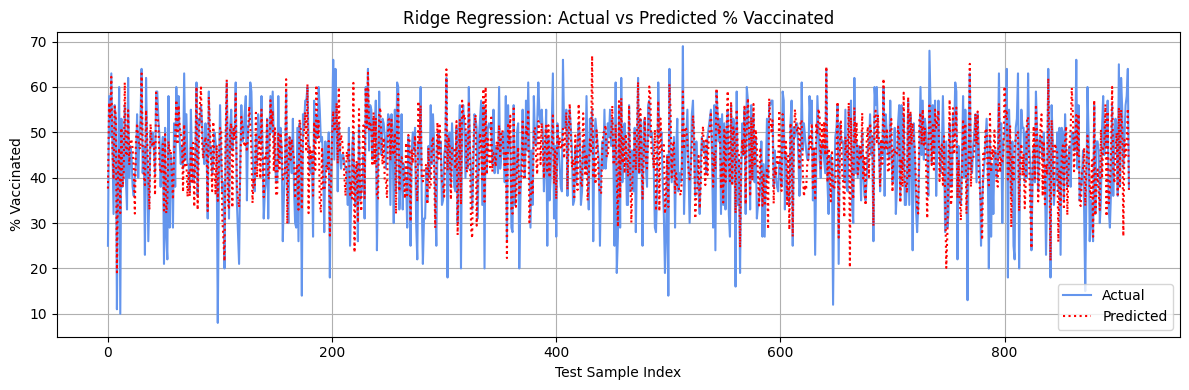

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# === Load and clean data ===
df = pd.read_excel("/Users/jacobhahn/Desktop/CSUREMM 2025/DATASET_during_covid_ind.xlsx")


# Drop identifier columns
df = df.drop(columns=["FIPS", "State, County"], errors="ignore")

# Keep only numeric data
df_numeric = df.select_dtypes(include=[np.number])

# Define X and y
X = df_numeric.drop(columns=["% Vaccinated"], errors="ignore")
y = df_numeric["% Vaccinated"]

# === Impute missing values in X ===
imputer = IterativeImputer(random_state=42)
X_imputed = imputer.fit_transform(X)
X_df = pd.DataFrame(X_imputed, columns=X.columns)

# === Drop rows with missing y values (aligned correctly) ===
y = y.reset_index(drop=True)
valid_mask = y.notna()
X_df = X_df[valid_mask].reset_index(drop=True)
y = y[valid_mask].reset_index(drop=True)

# === Scale features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=3141)

# === Fit Ridge regression ===
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# === Top 5 Most Influential Features (by |Coefficient|) ===
coef_series = pd.Series(ridge.coef_, index=X_train.columns)
top_5_ridge = coef_series.abs().sort_values(ascending=False).head(5).index

print("\n\n=== Top 5 Most Influential Features in Ridge Regression ===")
for feature in top_5_ridge:
    coef = coef_series[feature]
    print(f"{feature}: Coefficient = {coef:.4f}")


# === Evaluation metrics ===
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print("=== Ridge Regression Results ===")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f} %")


# === Plot predictions (all test samples) ===
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label="Actual", color="cornflowerblue")
plt.plot(y_pred, label="Predicted", color="red", linestyle=":")
plt.title("Ridge Regression: Actual vs Predicted % Vaccinated")
plt.xlabel("Test Sample Index")
plt.ylabel("% Vaccinated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Lasso Regression

/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Dropping '% High School Graduate' due to high VIF (9612.40)
Dropping '% Non-Hispanic White' due to high VIF (508.76)
Dropping '% in Manufacturing' due to high VIF (18.37)
Dropping '% in Management, business, science, arts occupations' due to high VIF (10.76)

--- Model Performance ---
RMSE: 8.31
MAE: 6.33
MAPE: 18.46%
R²: 0.405

Top 5 Predictors (Lasso):
                                                    Coefficient
% in Agriculture, forestry, fishing and hunting...    -2.760533
Median Household Income                                1.658748
% Rural                                               -1.190975
% in Public administration                            -0.818467
% Bachelor's Degree                                    0.715430


/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jacobhahn/path/to/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


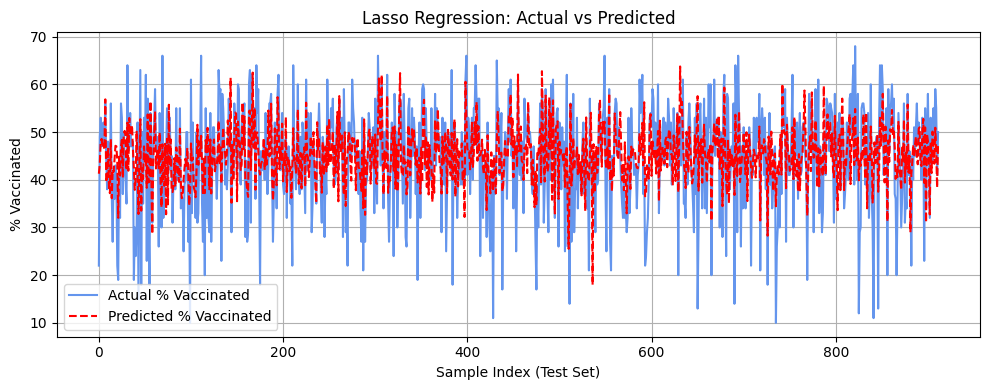


Final VIF Table:
                                              Feature       VIF
0                                                FIPS  1.179936
1                            % in Service occupations  2.750352
2                   % in Sales and office occupations  1.996713
3   % in Natural resources, construction, maintena...  2.892808
4   % in Agriculture, forestry, fishing and huntin...  3.649268
5                                % in Wholesale trade  1.244497
6                                   % in Retail trade  1.696486
7      % in Transportation and warehousing, utilities  1.265649
8                                    % in Information  1.259995
9   % in Finance, insurance, and real estate, rent...  1.805474
10          % in Professional, scientific, management  3.415679
11  % in Educational services, health care, social...  2.523925
12               % in Arts, entertainment, recreation  2.709390
13  % in Other services, except public administration  1.154190
14                    

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/Users/jacobhahn/Desktop/CSUREMM 2025/DATASET_during_covid_ind.xlsx")



# Drop any non-numeric columns except target
target_col = "% Vaccinated"
df_numeric = df.select_dtypes(include=[np.number])
if target_col not in df_numeric.columns:
    df_numeric[target_col] = df[target_col]

# Drop rows where target is missing
df_numeric = df_numeric[df_numeric[target_col].notna()].reset_index(drop=True)

# Split features and target
X_df = df_numeric.drop(columns=[target_col])
y = df_numeric[target_col]
# Impute missing values
imputer = IterativeImputer(random_state=42)
X_imputed = imputer.fit_transform(X_df)
X_imputed_df = pd.DataFrame(X_imputed, columns=X_df.columns)

# Calculate VIF and drop high-VIF columns iteratively
def drop_high_vif(X, threshold=10.0):
    while True:
        X_const = sm.add_constant(X)
        vif = pd.Series(
            [variance_inflation_factor(X_const.values, i) for i in range(1, X_const.shape[1])],
            index=X.columns
        )
        max_vif = vif.max()
        if max_vif > threshold:
            max_vif_feature = vif.idxmax()
            print(f"Dropping '{max_vif_feature}' due to high VIF ({max_vif:.2f})")
            X = X.drop(columns=[max_vif_feature])
        else:
            return X, vif

X_filtered, vif_series = drop_high_vif(pd.DataFrame(X_imputed_df, columns=X_df.columns))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit Lasso regression
lasso = Lasso(alpha=1, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
epsilon = 1e-10
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

print("\n--- Model Performance ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.3f}")

# Top 5 predictors (by absolute coefficient value)
coef_series = pd.Series(lasso.coef_, index=X_filtered.columns)
top5 = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)[:5]
print("\nTop 5 Predictors (Lasso):")
print(top5.to_frame(name="Coefficient"))

# Plot actual vs predicted
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual % Vaccinated', color='cornflowerblue')
plt.plot(y_pred, label='Predicted % Vaccinated', color='red', linestyle='--')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Sample Index (Test Set)')
plt.ylabel('% Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print VIF table
print("\nFinal VIF Table:")
vif_table = pd.DataFrame({'Feature': X_filtered.columns, 'VIF': vif_series.values})
print(vif_table)